In [15]:
data <- read.csv("data/data.csv", header = TRUE)

In [16]:
rownames(data) <- data$Roles

In [17]:
data <- data[, -1]

In [18]:
head(data)

,Hotel,Location,Res.Second,Parents,Amis,Camping,Sej.org,Autres
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Agriculteurs,195,62,1,499,44,141,49,65
Patrons,700,354,229,959,185,292,119,140
Cadres.sup,961,471,633,1580,305,360,162,148
Cadre.moy,572,537,279,1689,206,748,155,112
Employes,441,404,166,1079,178,434,178,92
Ouvriers,783,1114,387,4052,497,1464,525,387


In [19]:
dt <- as.table(as.matrix(data))
head(dt)

             Hotel Location Res.Second Parents Amis Camping Sej.org Autres
Agriculteurs   195       62          1     499   44     141      49     65
Patrons        700      354        229     959  185     292     119    140
Cadres.sup     961      471        633    1580  305     360     162    148
Cadre.moy      572      537        279    1689  206     748     155    112
Employes       441      404        166    1079  178     434     178     92
Ouvriers       783     1114        387    4052  497    1464     525    387

In [20]:
library(gplots)

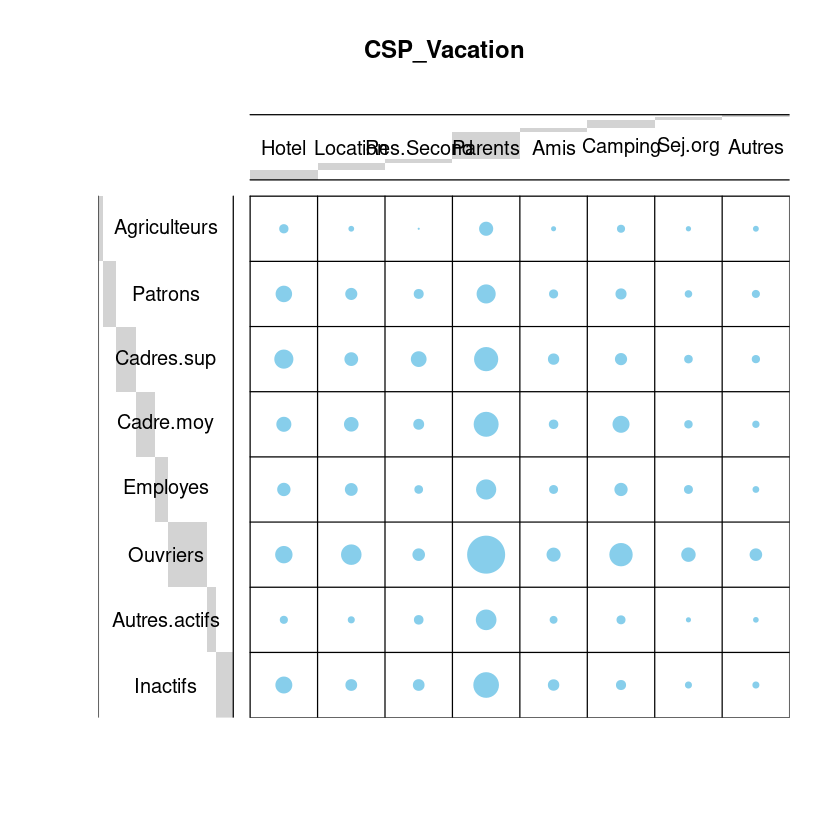

In [21]:
balloonplot(t(dt), main = "CSP_Vacation", xlab = "", ylab = "", label = FALSE,
show.margins = FALSE)

In [22]:
summary(dt)

Number of cases in table: 31079 
Number of factors: 2 
Test for independence of all factors:
	Chisq = 2292.1, df = 49, p-value = 0

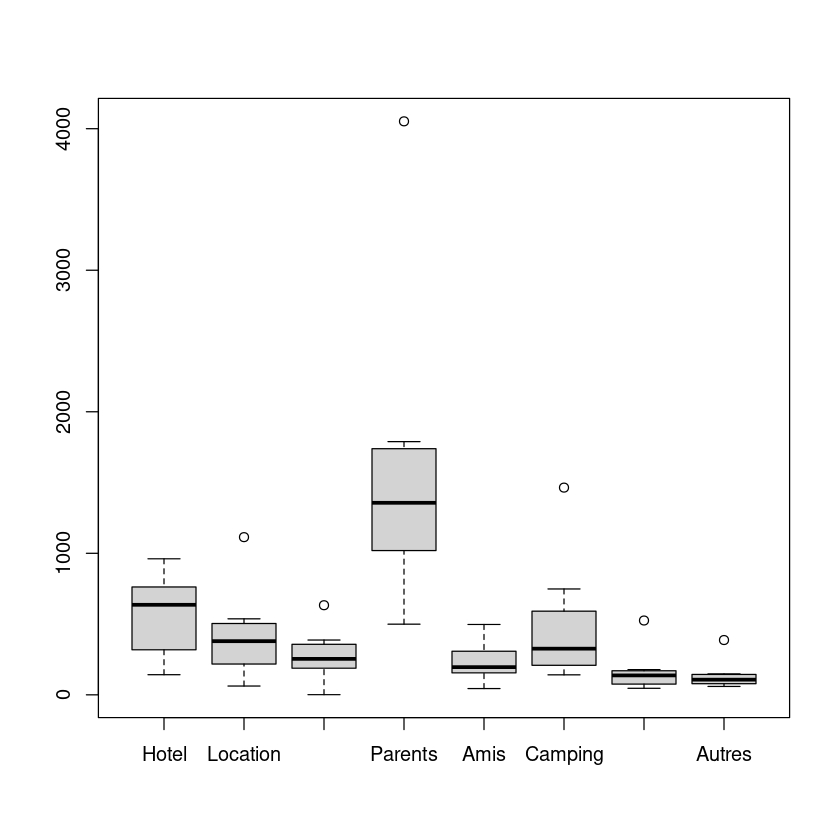

In [23]:
boxplot(data)

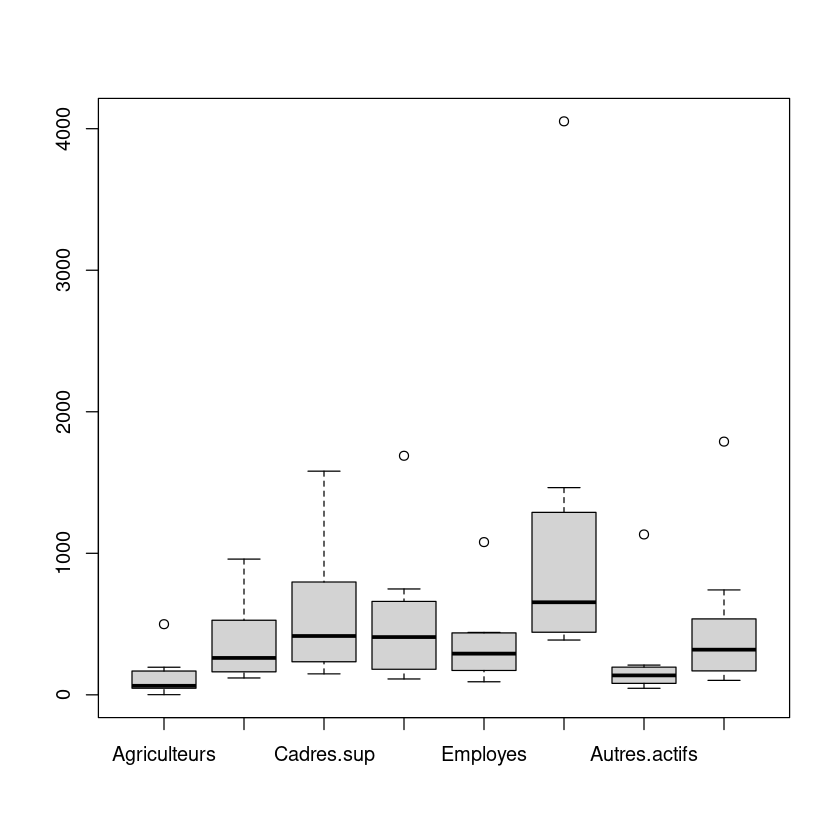

In [24]:
boxplot(t(data))

In [29]:
khd <- chisq.test(dt)
khd


	Pearson's Chi-squared test

data:  dt
X-squared = 2292.1, df = 49, p-value < 2.2e-16


In [30]:
I <- dim(dt)[1] # nrows
J <- dim(dt)[2] # ncols
dimIJ <- (I-1)*(J-1)
Beta <- (khd$statistic - dimIJ)/(sqrt(dimIJ))
Beta

X-squared 
 320.4497

In [34]:
library("factoextra")
library("FactoMineR")

,eigenvalue,percentage of variance,cumulative percentage of variance
dim 1,0.044,59.977,59.977
dim 2,0.018,23.997,83.973
dim 3,0.008,10.375,94.349
dim 4,0.002,3.038,97.386
dim 5,0.002,2.283,99.669
dim 6,0.000,0.330,99.999
dim 7,0.000,0.001,100.000


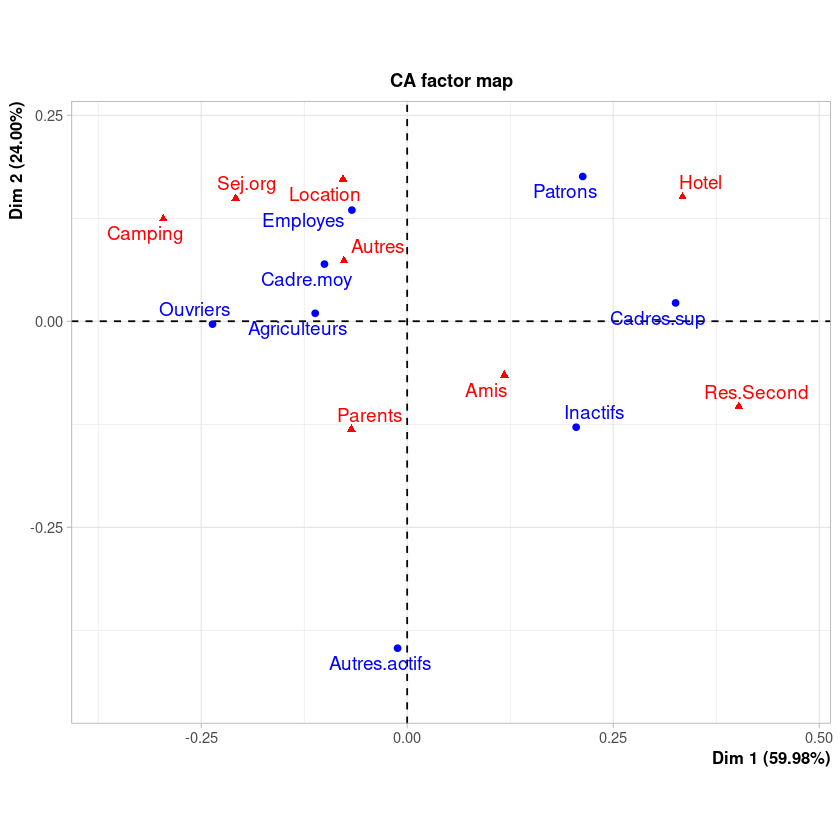

In [35]:
res.afc <- CA(dt)
round(res.afc$eig,3) 

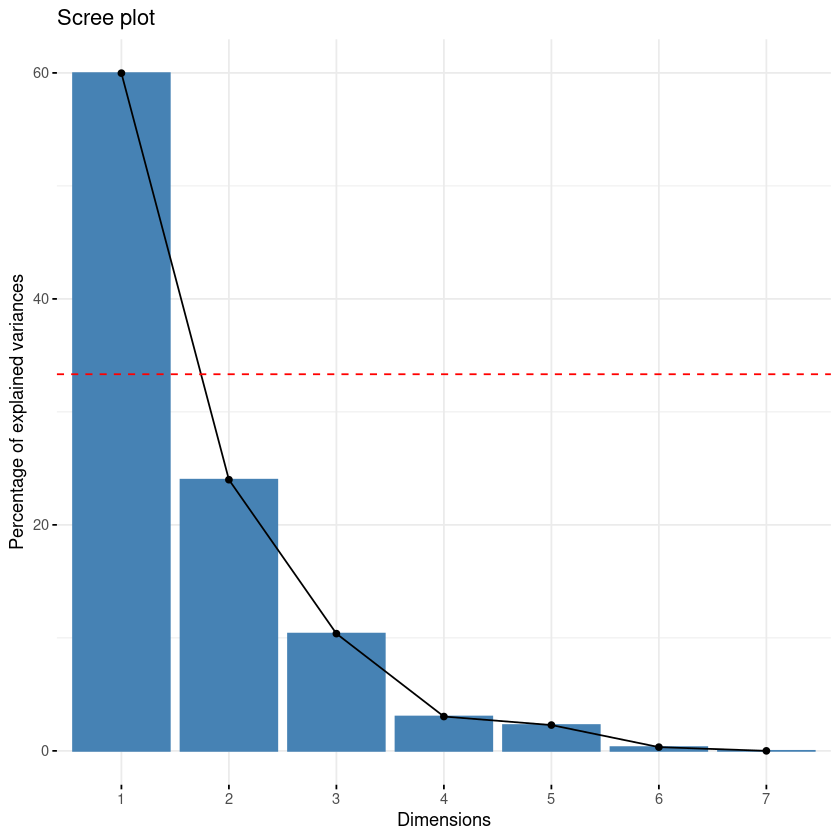

In [36]:
fviz_screeplot (res.afc) +
 geom_hline (yintercept = 33.33, linetype = 2, color = "red")

In [39]:
Lig <- get_ca_row(res.afc)
Lig
Lig$inertia
# Lig$coord

Correspondence Analysis - Results for rows
  Name       Description                
1 "$coord"   "Coordinates for the rows" 
2 "$cos2"    "Cos2 for the rows"        
3 "$contrib" "contributions of the rows"
4 "$inertia" "Inertia of the rows"      

[1] 0.004682768 0.008103198 0.017436381 0.004309660 0.002601600 0.016983667
[7] 0.010429415 0.009205605

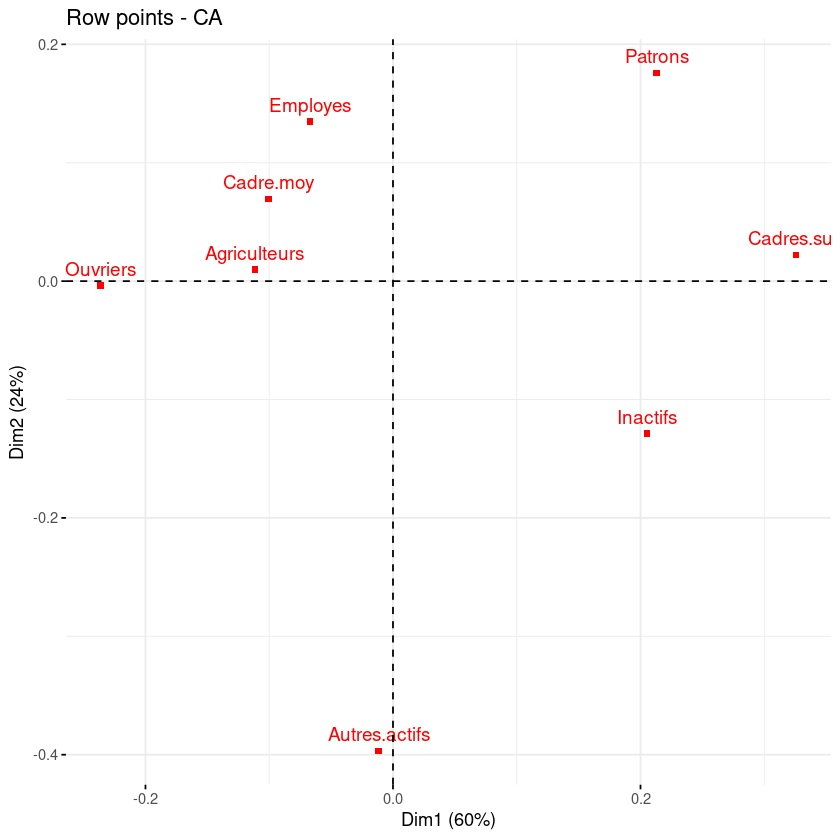

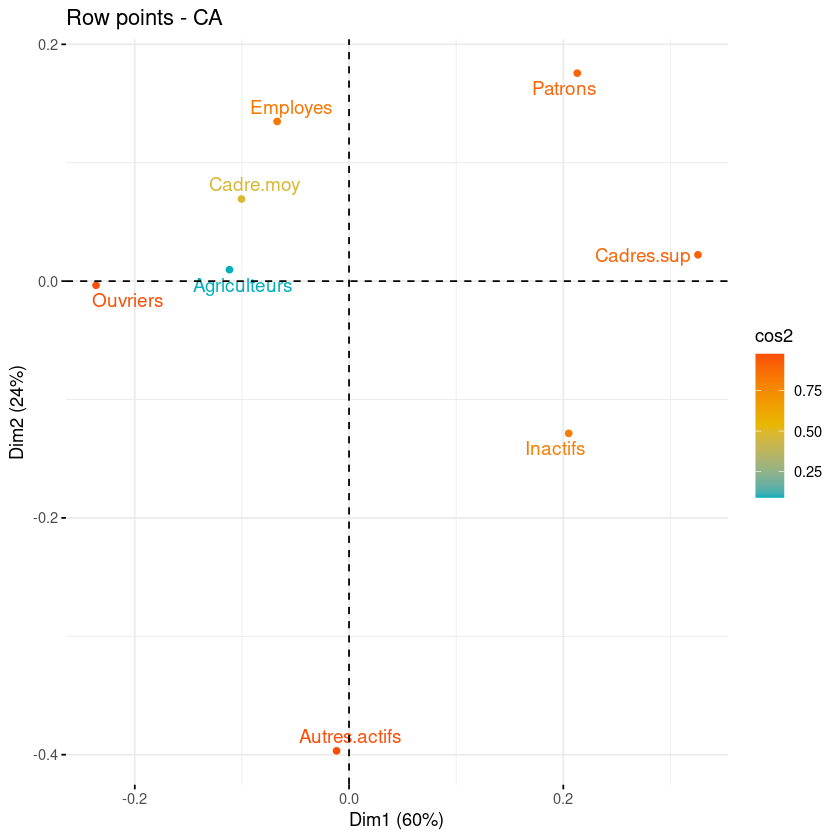

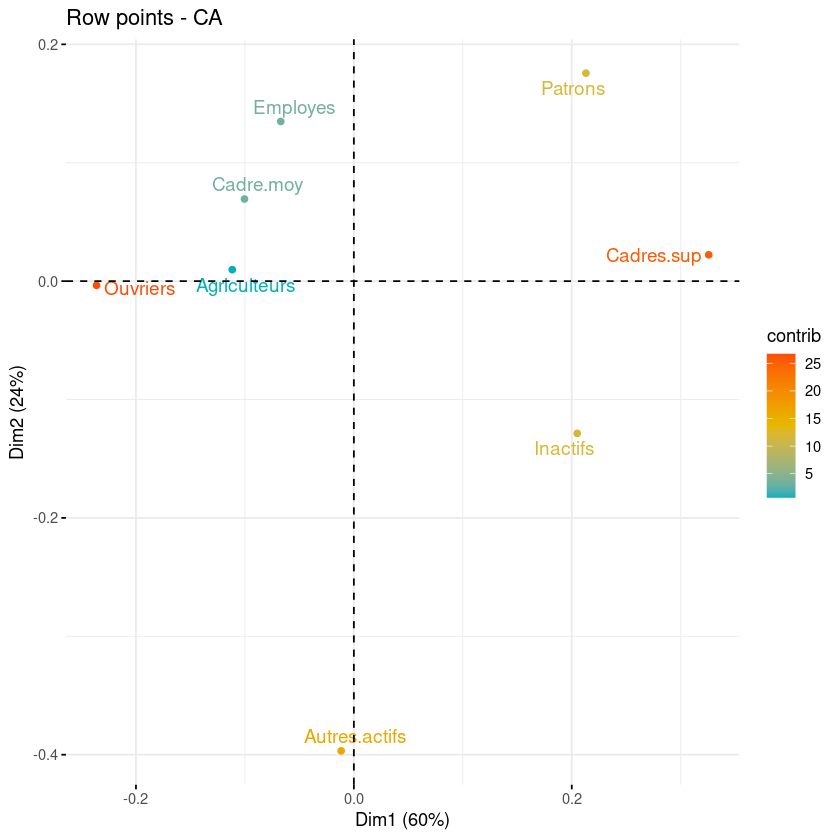

In [40]:
# Graphique
fviz_ca_row (res.afc, col.row = "red", shape.row = 15)
fviz_ca_row (res.afc, col.row = "cos2",
 gradient.cols = c ("#00AFBB", "#E7B800", "#FC4E07"),
 repel = TRUE)
fviz_ca_row (res.afc, col.row = "contrib",
 gradient.cols = c ("#00AFBB", "#E7B800", "#FC4E07"),
 repel = TRUE)

corrplot 0.92 loaded



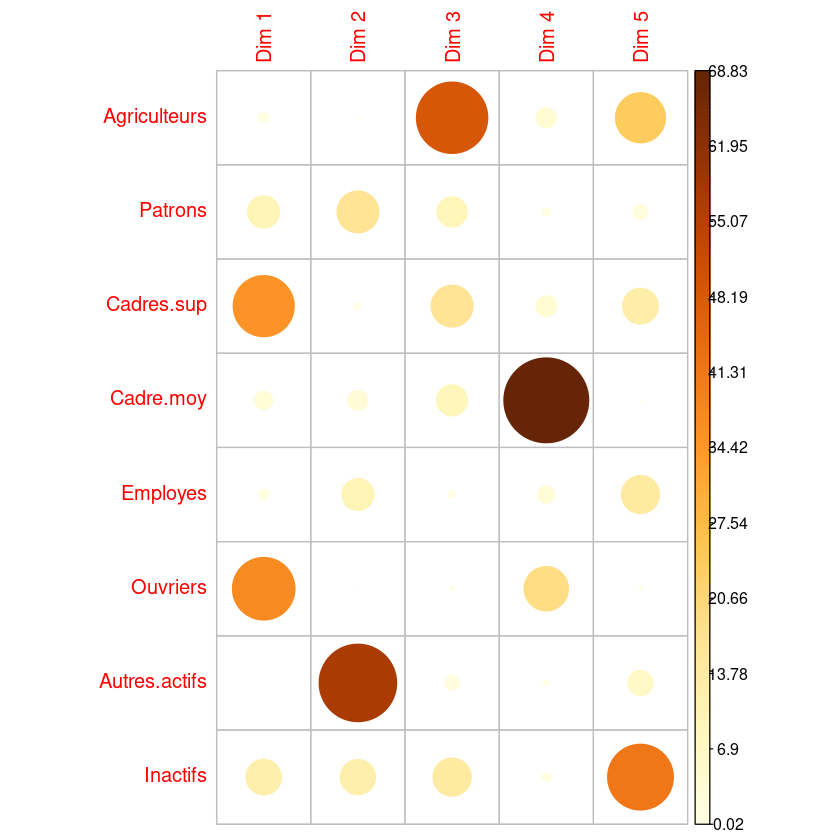

In [41]:
library("corrplot")
corrplot(res.afc$row$contrib, is.corr=FALSE)

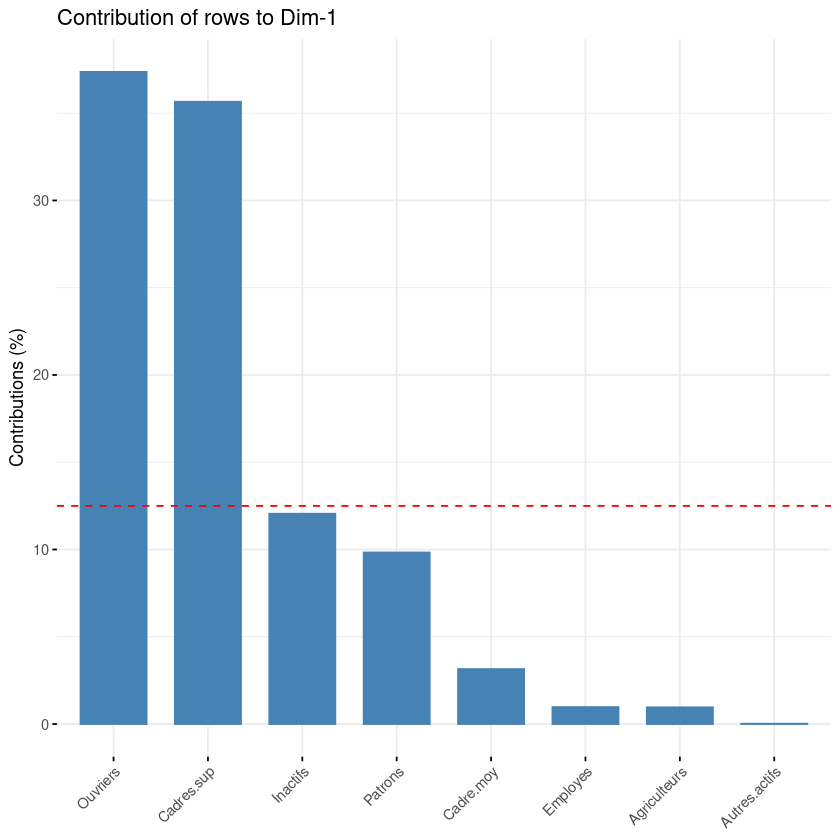

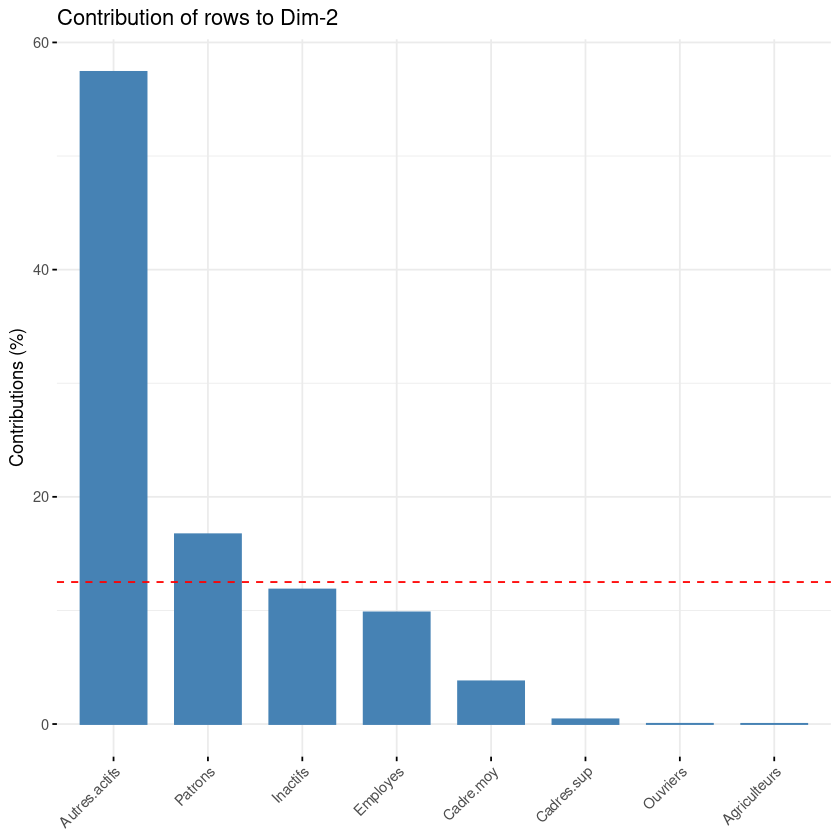

In [42]:
# Contributions des lignes ? la dimension 1
fviz_contrib(res.afc, choice = "row", axes = 1)
# Contributions des lignes ? la dimension 2
fviz_contrib(res.afc, choice = "row", axes = 2)

In [43]:
# Aussi, on peut identifier les contributions du profil-ligne i ? l'inertie de l'axe dim 1 :
# cont >= (1/|L|= 4= 25%)
res.afc$row$contrib
# on identifie .....
res.afc$row$coord # le signe donne le sens de contribution

,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
Agriculteurs,0.95677882,0.01801433,48.6726341,3.8344548,23.93783931
Patrons,9.82974105,16.70733721,8.7466638,0.5832593,2.15147752
Cadres.sup,35.65269429,0.41504523,16.7340797,4.0493338,12.30111902
Cadre.moy,3.15032176,3.75967087,9.2264771,68.8299839,0.06203631
Employes,0.97335351,9.82888382,0.5413749,2.8712499,13.91577299
Ouvriers,37.36664509,0.02091687,0.1961363,18.7774144,0.13052815
Autres.actifs,0.01979782,57.40745717,1.9524263,0.3222906,6.16165515
Inactifs,12.05066765,11.84267451,13.9302079,0.7320133,41.33957155


,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
Agriculteurs,-0.11160583,0.009686625,-0.331079734,-0.05028123,0.108913985
Patrons,0.21302067,0.175665571,-0.083575888,0.01167763,0.019443713
Cadres.sup,0.32571537,0.022229111,0.092811557,0.02470341,0.037327118
Cadre.moy,-0.10038234,0.069364473,0.071450764,-0.10559460,-0.002748292
Employes,-0.06710022,0.134872398,0.020813580,0.02593565,-0.049499681
Ouvriers,-0.23618313,-0.003534578,0.007116966,0.03767886,0.002723447
Autres.actifs,-0.01164813,-0.396747383,0.048110957,-0.01057656,0.040091875
Inactifs,0.20505507,-0.128579628,-0.091696513,-0.01137359,-0.074098260


Correspondence Analysis - Results for columns
  Name       Description                   
1 "$coord"   "Coordinates for the columns" 
2 "$cos2"    "Cos2 for the columns"        
3 "$contrib" "contributions of the columns"
4 "$inertia" "Inertia of the columns"      

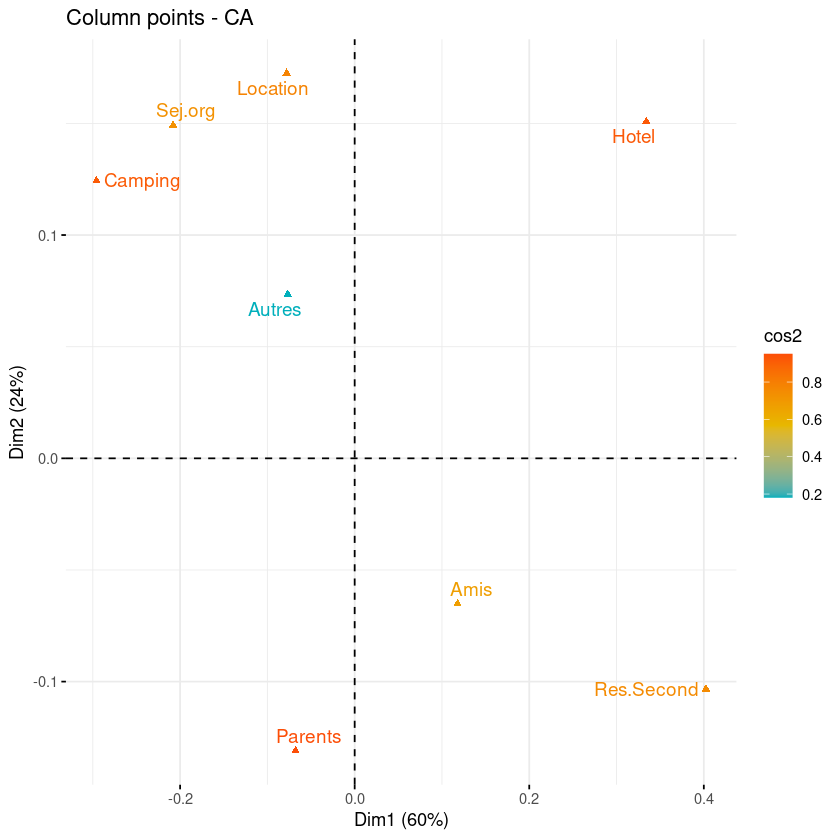

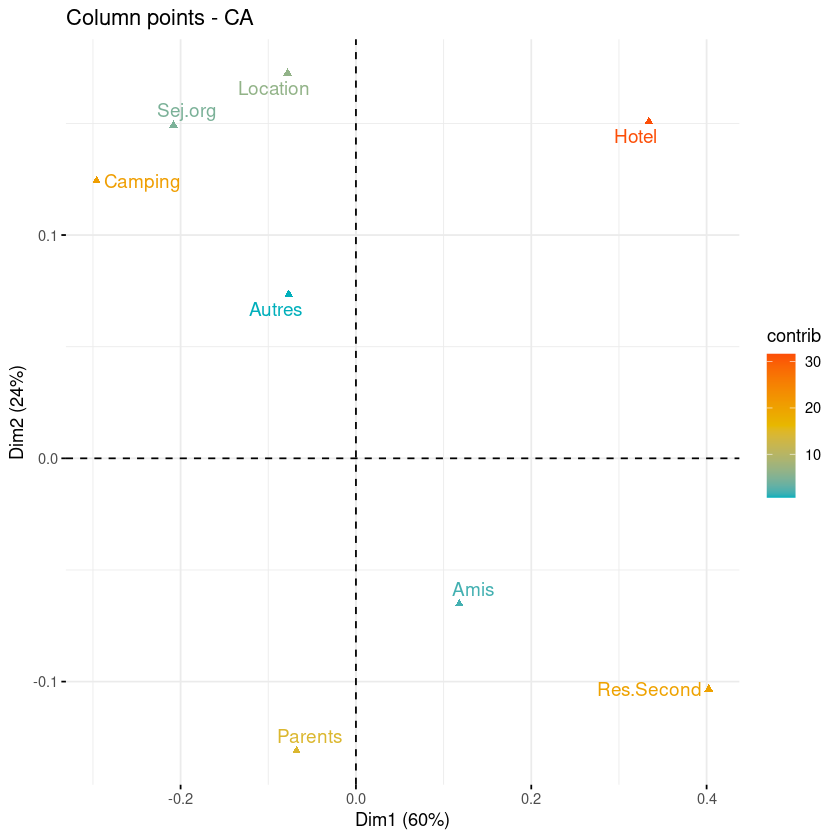

In [45]:
col <- get_ca_col(res.afc)
col
fviz_ca_col (res.afc, col.col = "cos2",
 gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
 repel = TRUE)
fviz_ca_col (res.afc, col.col = "contrib",
 gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
 repel = TRUE)

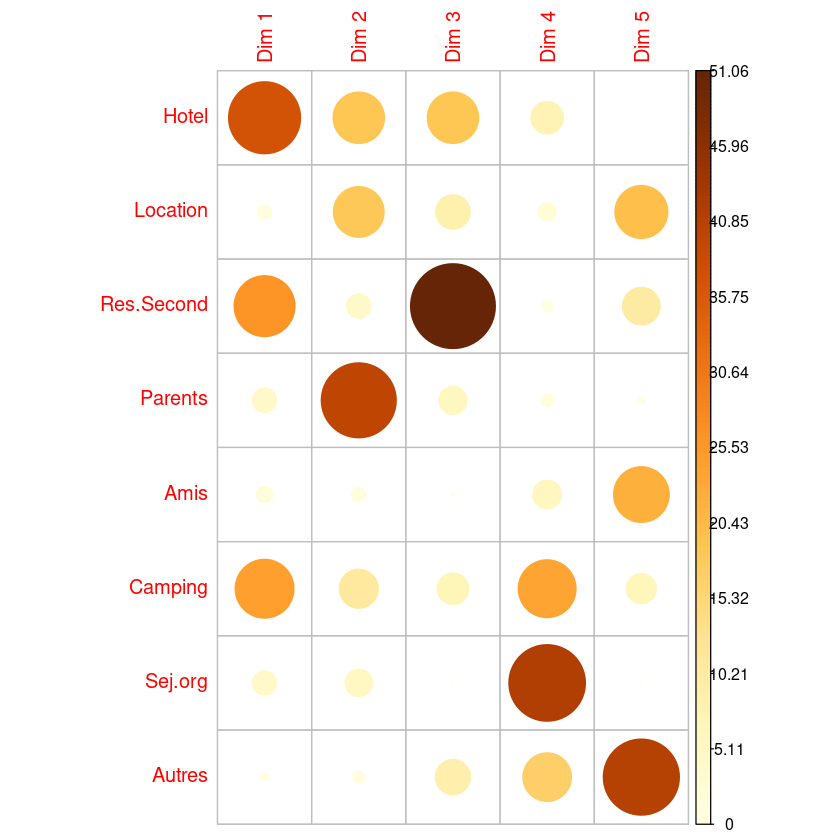

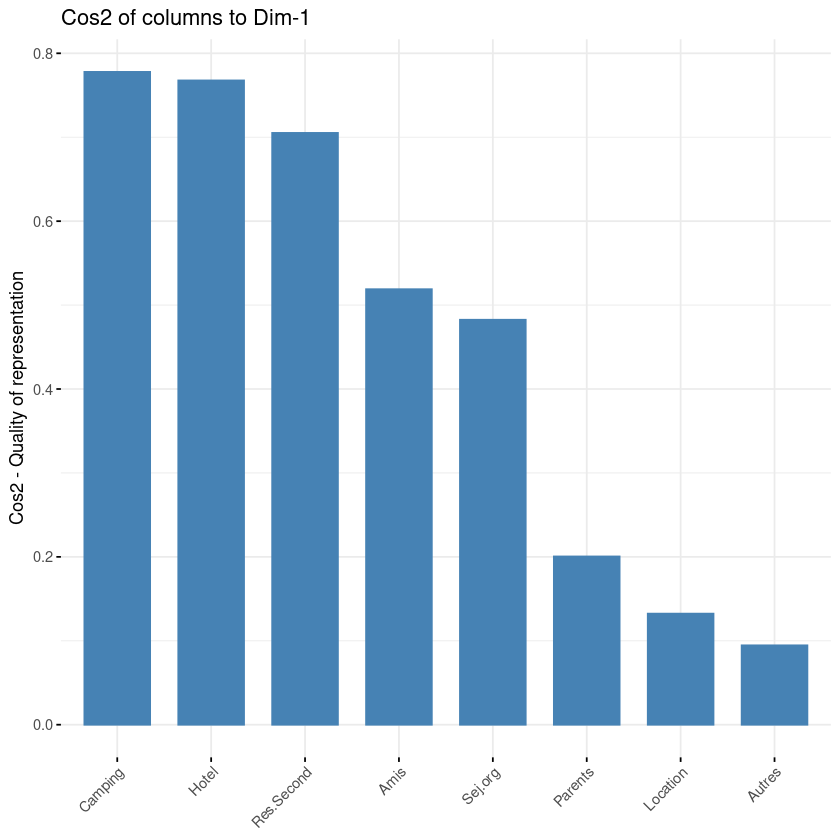

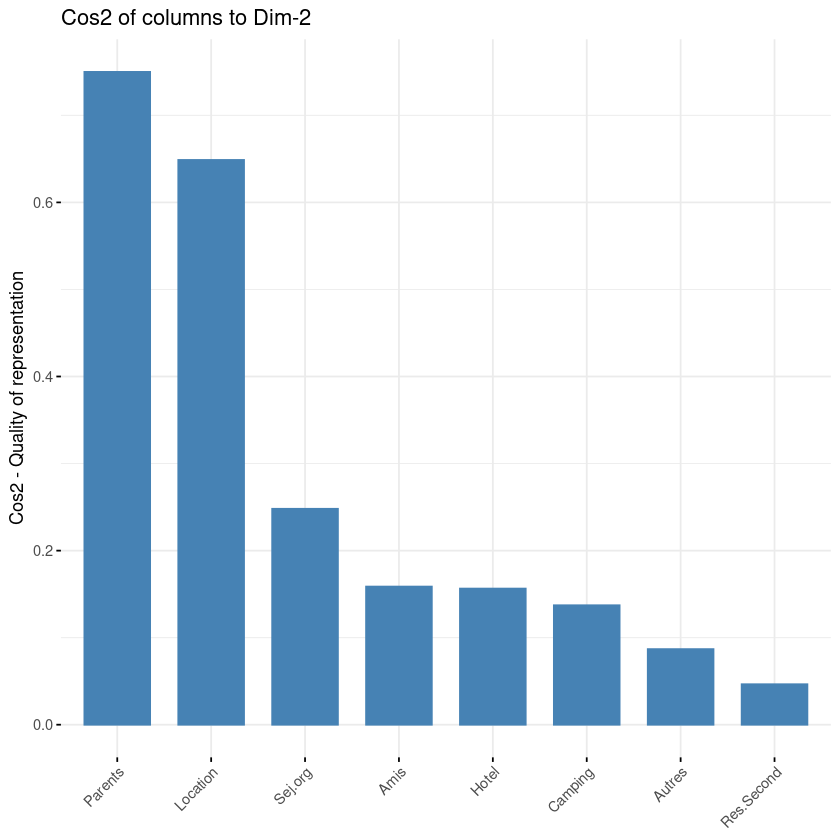

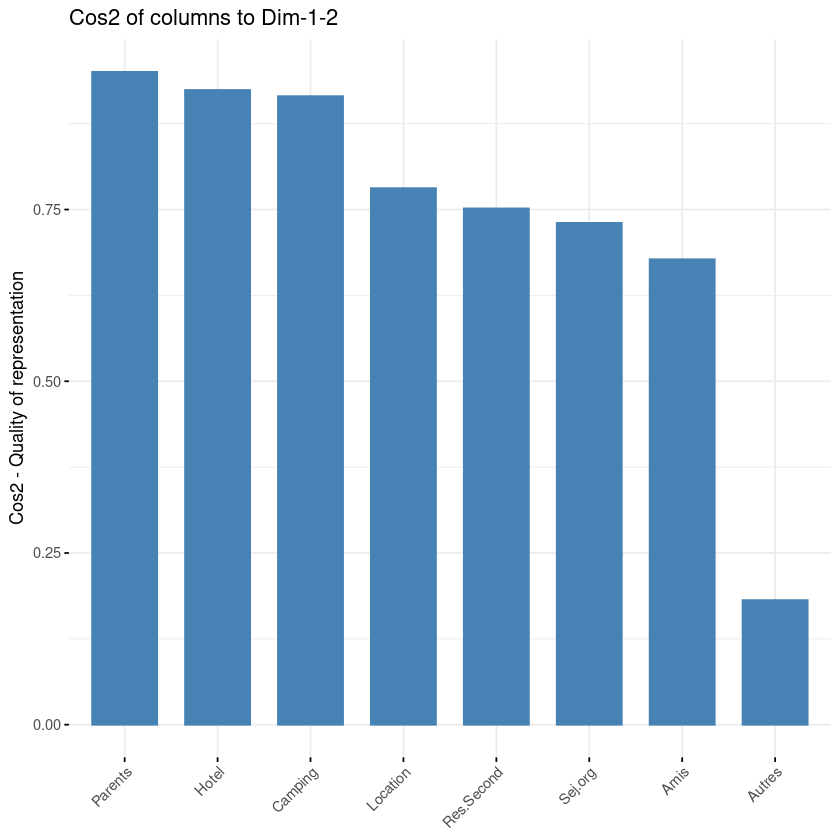

In [46]:
corrplot(col$contrib, is.corr=FALSE)
fviz_cos2 (res.afc, choice = "col", axes = 1)
fviz_cos2 (res.afc, choice = "col", axes = 2)
fviz_cos2 (res.afc, choice = "col", axes = 1:2)

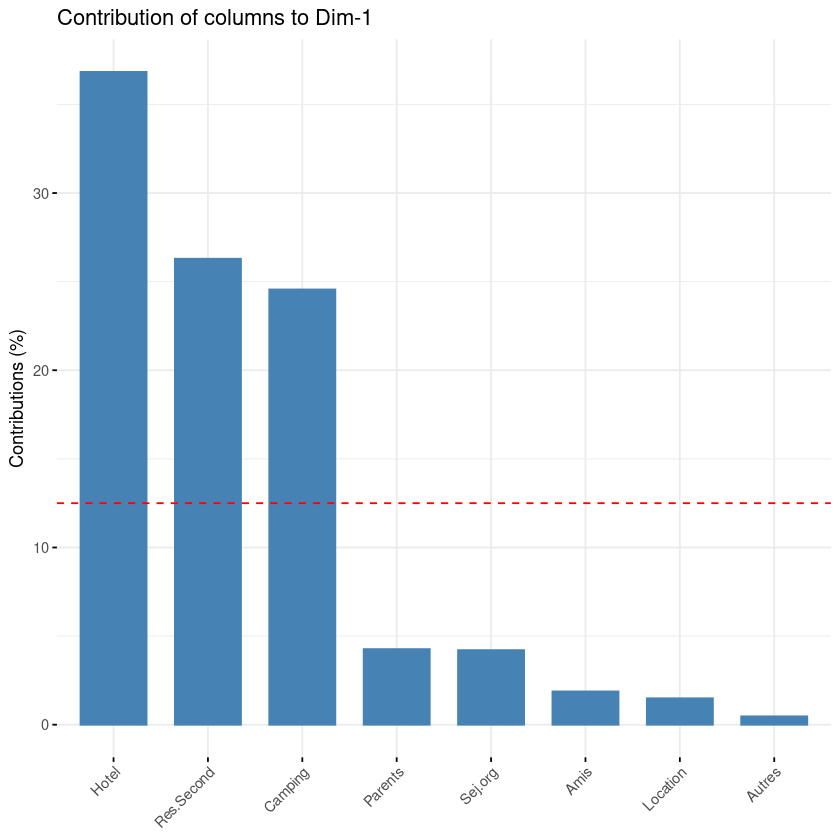

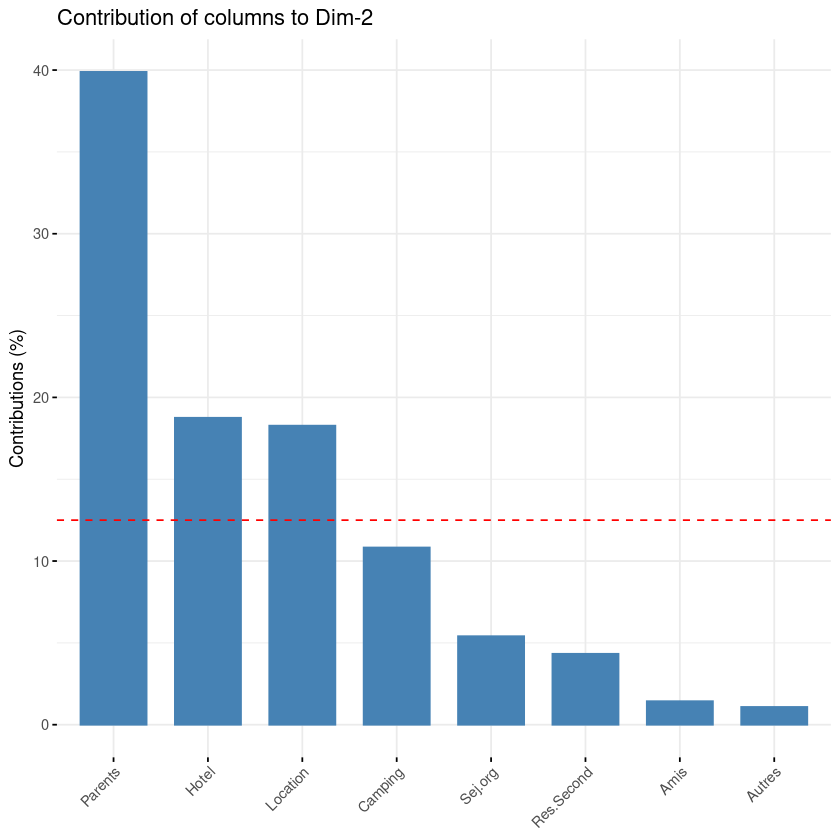

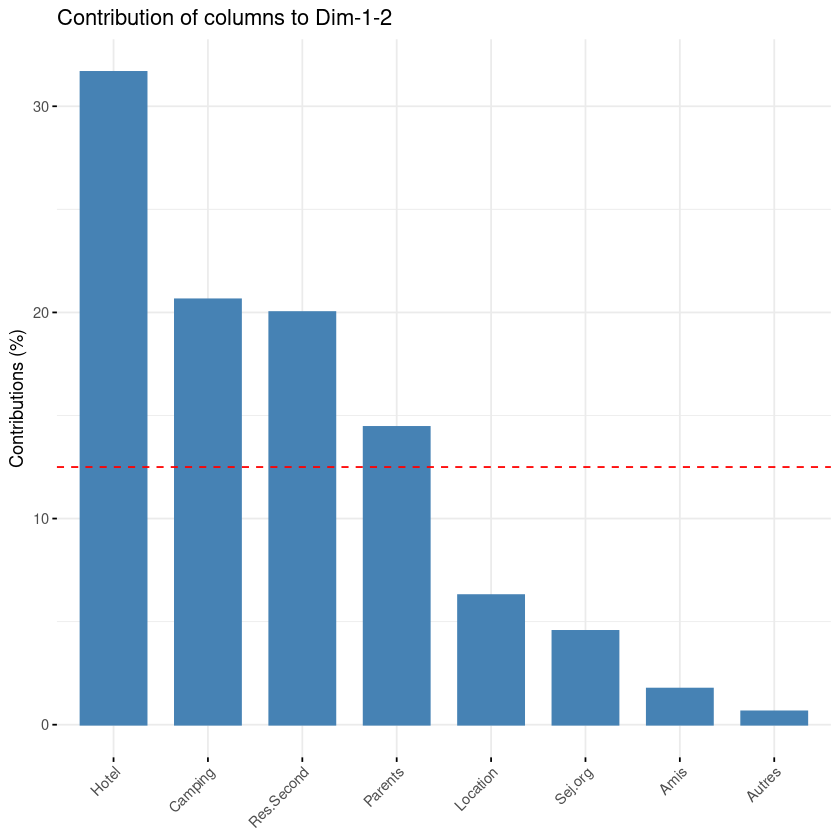

In [47]:
# Contributions des lignes ? la dimension 1
fviz_contrib(res.afc, choice = "col", axes = 1)
#fviz_contrib(res.afc, choice = "row", axes = 1)
# Contributions des lignes ? la dimension 2
fviz_contrib(res.afc, choice = "col", axes = 2)
fviz_contrib(res.afc, choice = "col", axes = 1:2)

In [48]:
### Contribution du profil-colonne j ? l'inertie de l'axe dim 1 :
# cont >= (1/|C|= 4= 25%)
res.afc$col$contrib
# on identifie
res.afc$col$coord # le signe donne le sens de contribution
# l'axe 1 caract?rise ...
# l'axe 2 .......

,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
Hotel,36.8332935,18.753645,18.777677965,7.4925265,0.01411624
Location,1.4913757,18.271910,8.473563758,2.3713439,19.89584445
Res.Second,26.2914900,4.332343,51.064114529,0.8766816,10.06482646
Parents,4.2662989,39.887876,5.657998150,1.1949537,0.42315126
Amis,1.8785006,1.435824,0.109901862,5.9130533,22.00420966
Camping,24.5582852,10.827425,7.081077367,23.7498699,6.47465617
Sej.org,4.2083884,5.406885,0.002432498,41.6101211,0.02651369
Autres,0.4723676,1.084092,8.833233871,16.7914500,41.09668206


,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
Hotel,0.33415248,0.15081675,-0.099232613,-0.033916543,0.001276274
Location,-0.07791859,0.17251300,0.077248428,0.022111480,-0.055525029
Res.Second,0.40241445,-0.10332602,0.233256062,0.016537122,0.048576831
Parents,-0.06774438,-0.13102386,-0.032448013,-0.008068563,-0.004162512
Amis,0.11789513,-0.06519633,-0.011860467,0.047072701,-0.078723277
Camping,-0.29589905,0.12427663,0.066085060,-0.065485958,0.029642374
Sej.org,-0.20809792,0.14919893,0.002080871,0.147259167,0.003222590
Autres,-0.07666056,0.07345940,-0.137879867,0.102860597,0.139506799


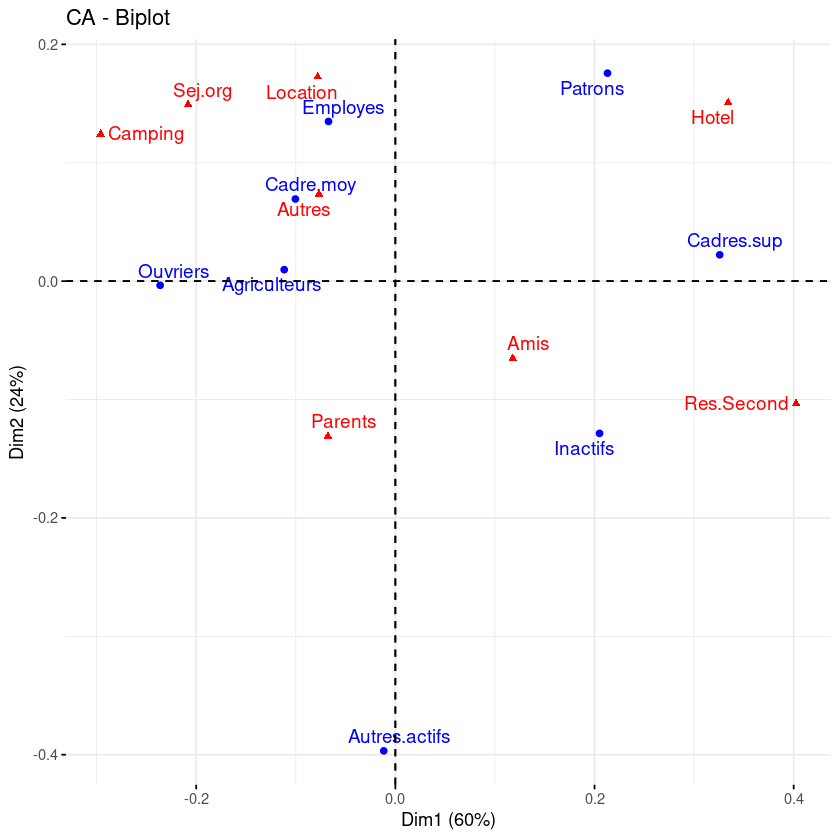

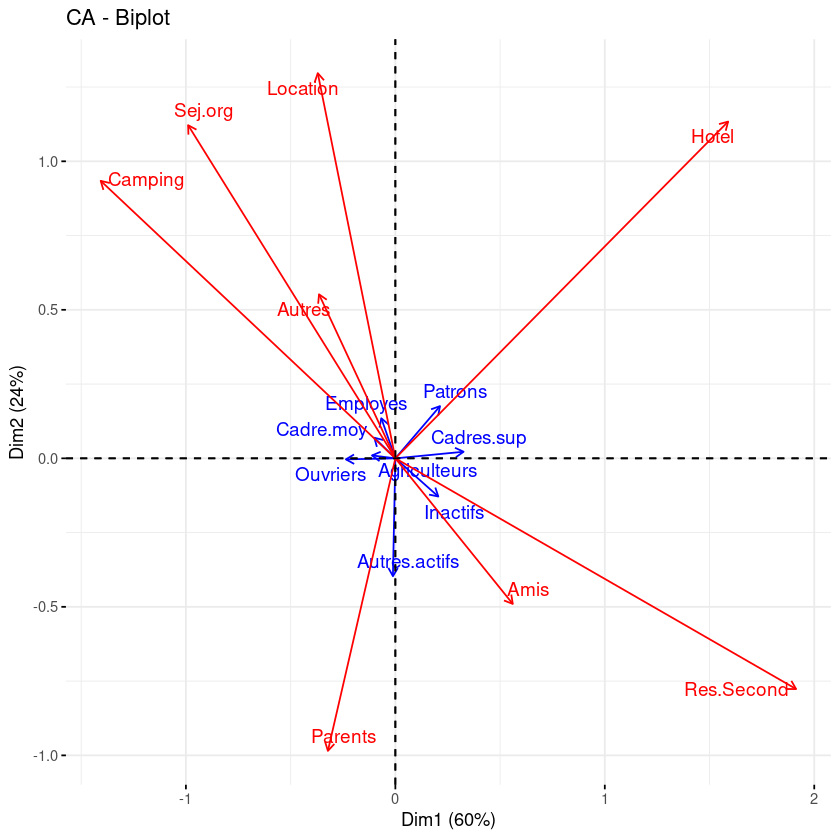

In [49]:
### Graphe simultan? /biplot
# Sym?trique
fviz_ca_biplot(res.afc, repel = TRUE)
# Asym?trique
fviz_ca_biplot (res.afc,
 map = "rowprincipal", arrow = c(TRUE, TRUE),
 repel = TRUE)

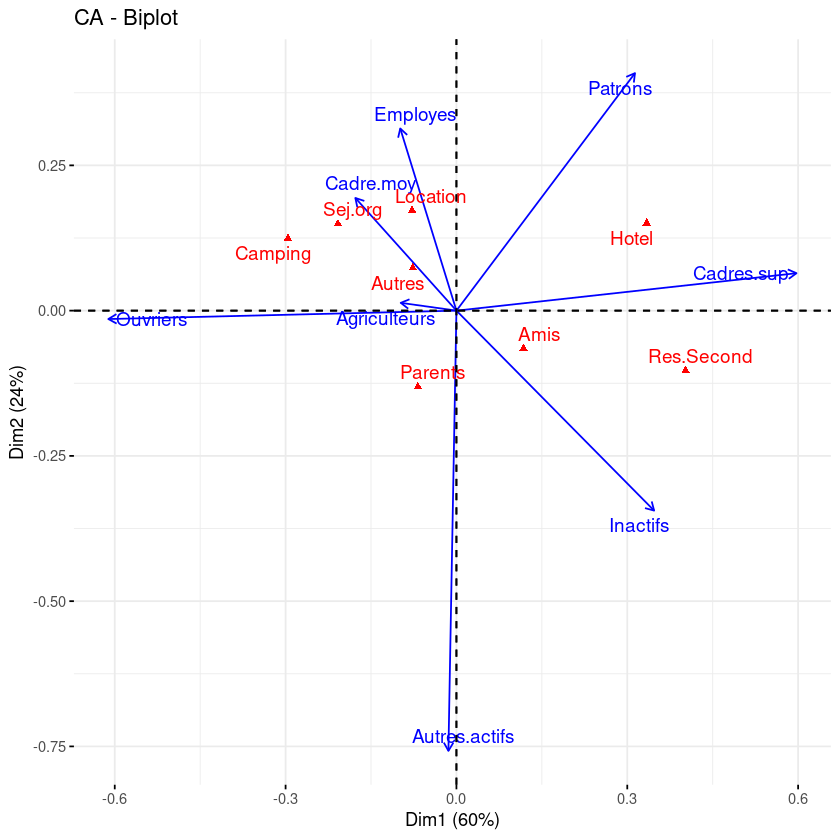

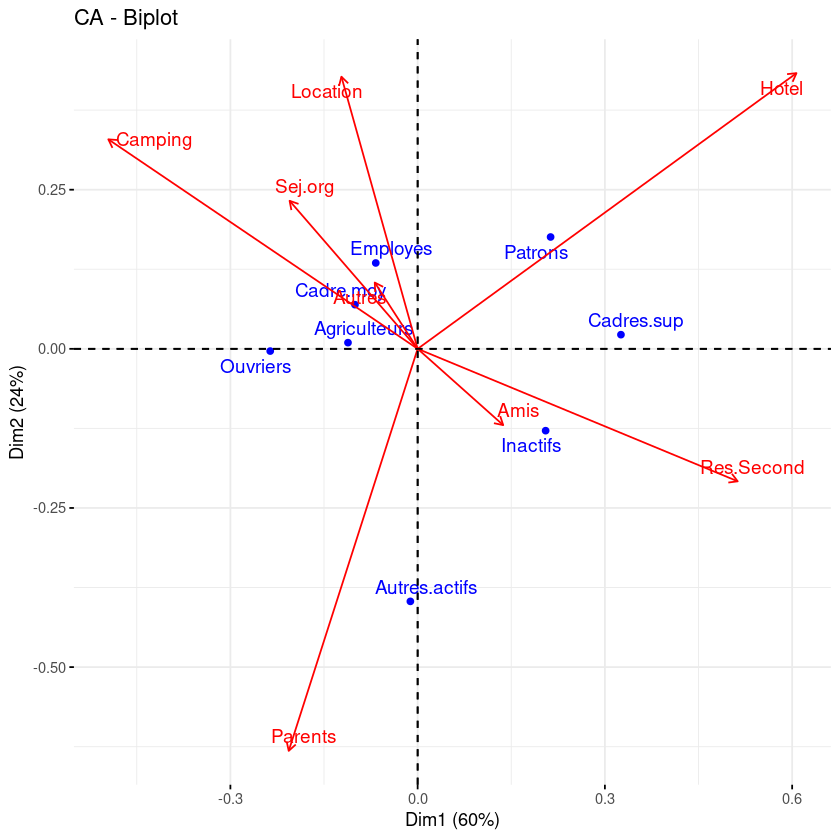

In [50]:
fviz_ca_biplot (res.afc, map = "colgreen", arrow = c (TRUE, FALSE),
 repel = TRUE)
fviz_ca_biplot (res.afc, map = "rowgreen", arrow = c (FALSE, TRUE),
 repel = TRUE)

In [51]:
res.desc <- dimdesc(res.afc, axes = c(1, 2))
res.desc[[1]]$row # par les lignes
res.desc[[1]]$col # par les colonnes
res.desc[[2]]$row
res.desc[[2]]$col

,coord
Ouvriers,-0.23618313
Agriculteurs,-0.11160583
Cadre.moy,-0.10038234
Employes,-0.06710022
Autres.actifs,-0.01164813
Inactifs,0.20505507
Patrons,0.21302067
Cadres.sup,0.32571537


,coord
Camping,-0.29589905
Sej.org,-0.20809792
Location,-0.07791859
Autres,-0.07666056
Parents,-0.06774438
Amis,0.11789513
Hotel,0.33415248
Res.Second,0.40241445


,coord
Autres.actifs,-0.396747383
Inactifs,-0.128579628
Ouvriers,-0.003534578
Agriculteurs,0.009686625
Cadres.sup,0.022229111
Cadre.moy,0.069364473
Employes,0.134872398
Patrons,0.175665571


,coord
Parents,-0.13102386
Res.Second,-0.10332602
Amis,-0.06519633
Autres,0.07345940
Camping,0.12427663
Sej.org,0.14919893
Hotel,0.15081675
Location,0.17251300
